In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

csv_path = os.path.join('..', 'data', 'data_set_final.csv')

df = pd.read_csv(csv_path)

C:\Users\ideva\AppData\Local\Temp\ipykernel_23868\2010920831.py:10: DtypeWarning: Columns (22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


In [2]:
df.head(5)

,LOJA_ID,LOJA,CIDADE,REGIAO,PRODUTIVIDADE_HORA,TOTAL_COLABORADORES,SKUS,CAIXAS_TRADICIONAIS,SELF_CHECKOUT,ABERTURA_LOJA,...,SKUS_DOWN,AUMENTO_PRECO,DESCIDA_PRECO,DATA_FERIADO,TIPO_FERIADO,FERIADO_FIXO,ABERTURA_FERIADO,NOME_EVENTO,INICIO_EVENTO,FIM_EVENTO
0,POR008,Gaia,Vila Nova de Gaia,Porto,210,56,37764,14,5,9:00,...,7488,12.83,14.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,POR008,Gaia,Vila Nova de Gaia,Porto,210,56,37764,14,5,9:00,...,5217,16.78,15.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POR008,Gaia,Vila Nova de Gaia,Porto,210,56,37764,14,5,9:00,...,5268,15.68,12.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,POR008,Gaia,Vila Nova de Gaia,Porto,210,56,37764,14,5,9:00,...,4635,13.92,14.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,POR008,Gaia,Vila Nova de Gaia,Porto,210,56,37764,14,5,9:00,...,7302,12.18,10.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,PRODUTIVIDADE_HORA,TOTAL_COLABORADORES,SKUS,CAIXAS_TRADICIONAIS,SELF_CHECKOUT,ITEMS,VALOR_VENDA,SKUS_UP,SKUS_DOWN,AUMENTO_PRECO,DESCIDA_PRECO,FERIADO_FIXO,ABERTURA_FERIADO
count,98637.000000,98637.000000,98637.000000,98637.000000,98637.000000,98637.000000,9.863700e+04,98637.000000,98637.000000,98637.000000,98637.000000,1089.000000,1089.000000
mean,199.742257,25.851597,11235.174985,15.076624,3.199236,15181.730852,4.500383e+04,1533.033274,2088.354907,13.645598,18.560173,0.543618,0.994490
std,97.587384,20.285882,13622.147947,6.822966,5.237514,18478.120753,6.220994e+04,2012.888818,3032.603379,4.365068,9.402634,0.498323,0.074056
min,0.000000,7.000000,2523.000000,3.000000,0.000000,2.000000,3.230000e+00,26.000000,253.000000,1.000000,10.000000,0.000000,0.000000
25%,133.000000,13.000000,2973.000000,12.000000,0.000000,2648.000000,4.738340e+03,390.000000,446.000000,11.260000,12.900000,0.000000,1.000000
50%,186.000000,15.000000,3364.000000,15.000000,0.000000,4359.000000,8.352820e+03,542.000000,802.000000,14.150000,15.830000,1.000000,1.000000
75%,233.000000,31.000000,15101.000000,17.000000,4.000000,24356.000000,7.301816e+04,1695.000000,2248.000000,17.060000,18.740000,1.000000,1.000000
max,461.000000,100.000000,48810.000000,50.000000,26.000000,189091.000000,2.134898e+06,9761.000000,24363.000000,20.000000,50.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98637 entries, 0 to 98636
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LOJA_ID              98637 non-null  object 
 1   LOJA                 98637 non-null  object 
 2   CIDADE               98637 non-null  object 
 3   REGIAO               98637 non-null  object 
 4   PRODUTIVIDADE_HORA   98637 non-null  int64  
 5   TOTAL_COLABORADORES  98637 non-null  int64  
 6   SKUS                 98637 non-null  int64  
 7   CAIXAS_TRADICIONAIS  98637 non-null  int64  
 8   SELF_CHECKOUT        98637 non-null  int64  
 9   ABERTURA_LOJA        98637 non-null  object 
 10  FECHO_LOJA           98637 non-null  object 
 11  DATA_VENDA           98637 non-null  object 
 12  ITEMS                98637 non-null  int64  
 13  VALOR_VENDA          98637 non-null  float64
 14  SKUS_UP              98637 non-null  int64  
 15  SKUS_DOWN            98637 non-null 

In [5]:
# calculate the number of events per store

print(df.groupby('NOME_EVENTO')['LOJA'].value_counts())

NOME_EVENTO                                          LOJA         
Campanha Natal                                       Famalicão        1
Campanha Sazonais de Verão e Dia Mundial da Criança  Torres Vedras    1
Entrada Campanha                                     Eiras            1
Folheto                                              Torres Vedras    1
INVENTARIO QUEIJOS                                   Matosinhos       1
IP Armazém Interiores                                Alverca          1
IP Artigos de Mesa                                   Alverca          1
                                                     Torres Vedras    1
IP Biológicos                                        Torres Vedras    1
IP Brinquedos                                        Torres Vedras    1
IP Decoração Natal                                   Torres Vedras    1
IP Drogaria                                          Torres Vedras    1
IP Equip. Tec.                                       Torres Vedras   

In [6]:
# convert to datetime 

df['DATA_VENDA'] = pd.to_datetime(df['DATA_VENDA'])
df["ABERTURA_LOJA"] = pd.to_datetime(df["ABERTURA_LOJA"],format="%H:%M")
df["FECHO_LOJA"] = pd.to_datetime(df["FECHO_LOJA"],format="%H:%M")

# print the min and max date

min_date = df['DATA_VENDA'].min()
max_date = df['DATA_VENDA'].max()

print(f"Minimum date: {min_date}")
print(f"Maximum date: {max_date}")


Minimum date: 2019-01-01 00:00:00
Maximum date: 2023-10-30 00:00:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98637 entries, 0 to 98636
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   LOJA_ID              98637 non-null  object        
 1   LOJA                 98637 non-null  object        
 2   CIDADE               98637 non-null  object        
 3   REGIAO               98637 non-null  object        
 4   PRODUTIVIDADE_HORA   98637 non-null  int64         
 5   TOTAL_COLABORADORES  98637 non-null  int64         
 6   SKUS                 98637 non-null  int64         
 7   CAIXAS_TRADICIONAIS  98637 non-null  int64         
 8   SELF_CHECKOUT        98637 non-null  int64         
 9   ABERTURA_LOJA        98637 non-null  datetime64[ns]
 10  FECHO_LOJA           98637 non-null  datetime64[ns]
 11  DATA_VENDA           98637 non-null  datetime64[ns]
 12  ITEMS                98637 non-null  int64         
 13  VALOR_VENDA          98637 non-

In [8]:
# Calculate for how long the stores are open daily

df['TEMPO_ABERTURA'] = df['FECHO_LOJA'] - df['ABERTURA_LOJA']
df['HORAS_ABERTURA'] = df['TEMPO_ABERTURA'].dt.total_seconds() / 3600

print(df[["LOJA_ID","ABERTURA_LOJA","FECHO_LOJA","TEMPO_ABERTURA","HORAS_ABERTURA"]])

      LOJA_ID       ABERTURA_LOJA          FECHO_LOJA  TEMPO_ABERTURA  \
0      POR008 1900-01-01 09:00:00 1900-01-01 23:00:00 0 days 14:00:00   
1      POR008 1900-01-01 09:00:00 1900-01-01 23:00:00 0 days 14:00:00   
2      POR008 1900-01-01 09:00:00 1900-01-01 23:00:00 0 days 14:00:00   
3      POR008 1900-01-01 09:00:00 1900-01-01 23:00:00 0 days 14:00:00   
4      POR008 1900-01-01 09:00:00 1900-01-01 23:00:00 0 days 14:00:00   
...       ...                 ...                 ...             ...   
98632   U0143 1900-01-01 09:00:00 1900-01-01 23:00:00 0 days 14:00:00   
98633   U0143 1900-01-01 09:00:00 1900-01-01 23:00:00 0 days 14:00:00   
98634   U0143 1900-01-01 09:00:00 1900-01-01 23:00:00 0 days 14:00:00   
98635   U0143 1900-01-01 09:00:00 1900-01-01 23:00:00 0 days 14:00:00   
98636   U0143 1900-01-01 09:00:00 1900-01-01 23:00:00 0 days 14:00:00   

       HORAS_ABERTURA  
0                14.0  
1                14.0  
2                14.0  
3                14.0  
4  

In [9]:
# order, at least, by date to calculate "lags"

df.sort_values(['LOJA', 'DATA_VENDA'], inplace=True)

In [10]:
 # lag 7th day

df.groupby('LOJA_ID')['VALOR_VENDA'].shift(7)

16931         NaN
16930         NaN
16932         NaN
16899         NaN
16924         NaN
           ...   
14841    53749.89
13235    80297.53
14283    98864.83
13780    90704.78
14550    63276.77
Name: VALOR_VENDA, Length: 98637, dtype: float64

In [11]:
# average sales from the last 15 days 

df.groupby('LOJA_ID')['VALOR_VENDA'].shift(1).rolling(15).median() 

16931         NaN
16930         NaN
16932         NaN
16899         NaN
16924         NaN
           ...   
14841    57382.49
13235    57844.23
14283    63276.77
13780    63276.77
14550    63276.77
Name: VALOR_VENDA, Length: 98637, dtype: float64

In [12]:
# round sales amount

df['VALOR_VENDA'] = df['VALOR_VENDA'].round(2)

# calculate the sales amount by store

venda_loja = df.groupby('LOJA')['VALOR_VENDA'].sum().reset_index()

pd.options.display.float_format = '{:,.2f}'.format

print(venda_loja)

                LOJA    VALOR_VENDA
0          Alfragide 272,996,233.97
1       Almada Fórum 471,076,650.69
2            Alverca 184,935,545.55
3             Aveiro 176,927,728.09
4   Caldas da Rainha  17,403,657.36
..               ...            ...
65     Torres Vedras  86,328,388.63
66         Vila Real  79,535,386.04
67     Vila do Conde 122,966,144.27
68             Viseu 124,017,548.15
69             Évora  98,631,113.65

[70 rows x 2 columns]


In [13]:
df['VALOR_VENDA']

16931   184,916.56
16930   186,198.88
16932   273,227.61
16899   223,363.18
16924   151,308.76
           ...    
14841    57,844.23
13235    87,770.84
14283   116,786.20
13780   102,317.38
14550    70,006.31
Name: VALOR_VENDA, Length: 98637, dtype: float64

In [14]:
# Check for missing values

print(df.isnull().sum())

LOJA_ID                    0
LOJA                       0
CIDADE                     0
REGIAO                     0
PRODUTIVIDADE_HORA         0
TOTAL_COLABORADORES        0
SKUS                       0
CAIXAS_TRADICIONAIS        0
SELF_CHECKOUT              0
ABERTURA_LOJA              0
FECHO_LOJA                 0
DATA_VENDA                 0
ITEMS                      0
VALOR_VENDA                0
SKUS_UP                    0
SKUS_DOWN                  0
AUMENTO_PRECO              0
DESCIDA_PRECO              0
DATA_FERIADO           97548
TIPO_FERIADO           97548
FERIADO_FIXO           97548
ABERTURA_FERIADO       97548
NOME_EVENTO            98596
INICIO_EVENTO          98596
FIM_EVENTO             98596
TEMPO_ABERTURA             0
HORAS_ABERTURA             0
dtype: int64


In [15]:
# Summary statistics for numerical columns

print(df[['PRODUTIVIDADE_HORA', 'TOTAL_COLABORADORES', 'VALOR_VENDA']].describe())

       PRODUTIVIDADE_HORA  TOTAL_COLABORADORES  VALOR_VENDA
count           98,637.00            98,637.00    98,637.00
mean               199.74                25.85    45,003.83
std                 97.59                20.29    62,209.94
min                  0.00                 7.00         3.23
25%                133.00                13.00     4,738.34
50%                186.00                15.00     8,352.82
75%                233.00                31.00    73,018.16
max                461.00               100.00 2,134,898.15


In [16]:
productivity_by_store = df.groupby("LOJA_ID")["PRODUTIVIDADE_HORA"].mean().reset_index()

print(productivity_by_store)

   LOJA_ID  PRODUTIVIDADE_HORA
0   POR008              210.00
1   POR009              280.00
2   POR010              195.00
3   POR012              400.00
4   POR013              330.00
..     ...                 ...
65  POR445              449.00
66  POR446              133.00
67   U0141                0.00
68   U0142                0.00
69   U0143                0.00

[70 rows x 2 columns]


In [17]:
# Summary statistics for categorical columns

print(df['REGIAO'].value_counts())

REGIAO
Lisboa Central    37029
Margem Sul        19108
Porto              8202
Algarve            6886
Lisboa Norte       6842
Região Norte       6800
Beira Litoral      5507
Beira Interior     4134
Lisboa Litoral     4129
Name: count, dtype: int64


In [18]:
# Select only numeric columns

numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix

correlation_matrix = numeric_df.corr()

# Display the correlation matrix

print(correlation_matrix)

                     PRODUTIVIDADE_HORA  TOTAL_COLABORADORES  SKUS  \
PRODUTIVIDADE_HORA                 1.00                 0.54  0.45   
TOTAL_COLABORADORES                0.54                 1.00  0.94   
SKUS                               0.45                 0.94  1.00   
CAIXAS_TRADICIONAIS                0.25                 0.39  0.27   
SELF_CHECKOUT                      0.50                 0.58  0.55   
ITEMS                              0.57                 0.92  0.85   
VALOR_VENDA                        0.55                 0.90  0.83   
SKUS_UP                            0.41                 0.87  0.92   
SKUS_DOWN                          0.37                 0.79  0.84   
AUMENTO_PRECO                     -0.00                 0.00  0.00   
DESCIDA_PRECO                     -0.00                -0.00 -0.00   
FERIADO_FIXO                      -0.22                -0.12 -0.13   
ABERTURA_FERIADO                  -0.12                -0.12 -0.08   
TEMPO_ABERTURA      

In [19]:
correlation = df["VALOR_VENDA"].corr(df["SKUS"])

print(f"Correlation between sales and products sold: {correlation}")

Correlation between sales and products sold: 0.8335984709035305


In [20]:
correlation = df["VALOR_VENDA"].corr(df["ITEMS"])

print(f"Correlation between sales and products sold: {correlation}")

Correlation between sales and products sold: 0.9768785628635346


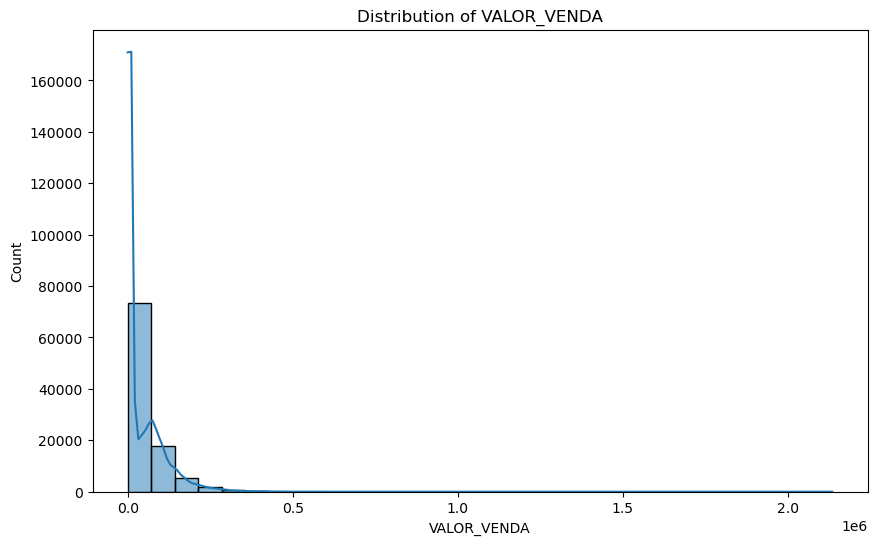

In [21]:
# Histogram of 'VALOR_VENDA'

plt.figure(figsize=(10, 6))
sns.histplot(df['VALOR_VENDA'], bins=30, kde=True)
plt.title('Distribution of VALOR_VENDA')
plt.show()

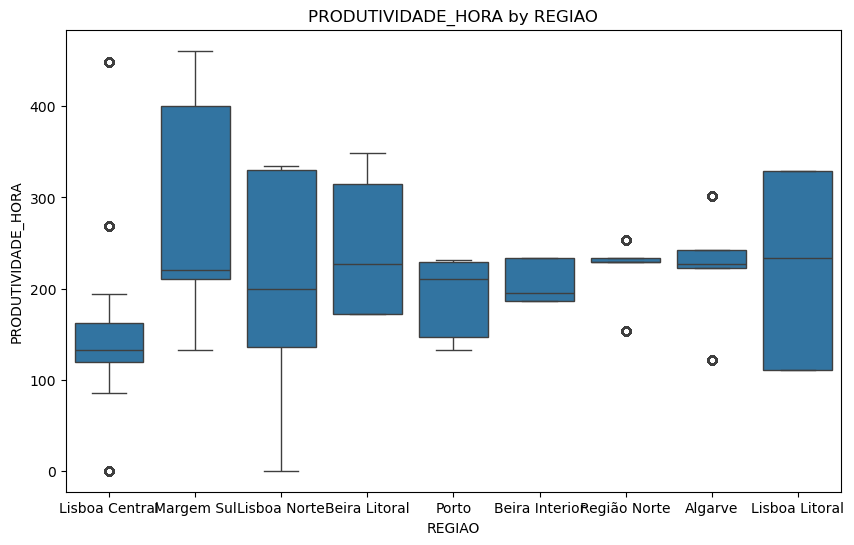

In [22]:
# Box plot of 'PRODUTIVIDADE_HORA' by 'REGIAO'

plt.figure(figsize=(10, 6))
sns.boxplot(x='REGIAO', y='PRODUTIVIDADE_HORA', data=df)
plt.title('PRODUTIVIDADE_HORA by REGIAO')
plt.show()

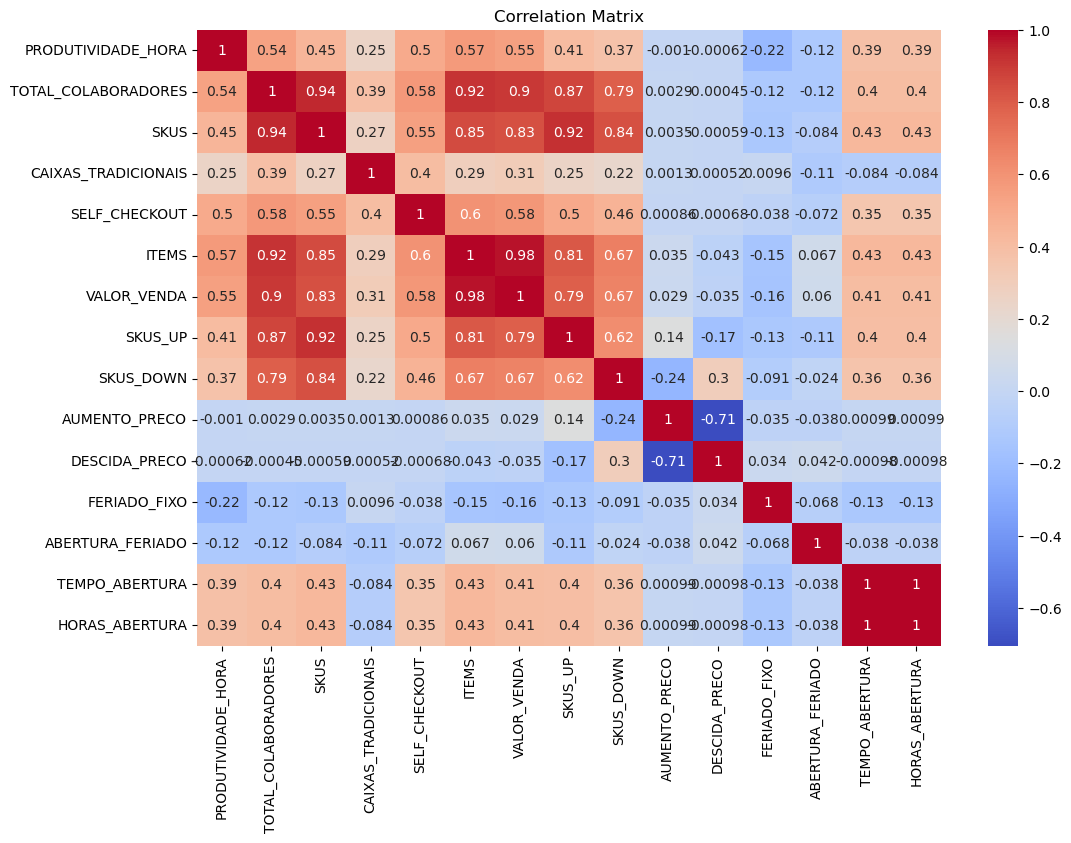

In [23]:
# Heatmap of correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
# Group by 'REGIAO' and calculate mean of 'VALOR_VENDA'

regional_sales = df.groupby('REGIAO')['VALOR_VENDA'].mean()
print(regional_sales)

REGIAO
Algarve          69,823.76
Beira Interior   62,632.84
Beira Litoral    75,537.44
Lisboa Central   12,117.49
Lisboa Litoral   74,911.65
Lisboa Norte     46,407.40
Margem Sul       57,502.23
Porto            76,436.24
Região Norte     70,899.48
Name: VALOR_VENDA, dtype: float64


In [25]:
# Group by 'LOJA' and calculate the sum of 'VALOR_VENDA'

store_sales = df.groupby('LOJA')['VALOR_VENDA'].sum()
print(store_sales)

LOJA
Alfragide          272,996,233.97
Almada Fórum       471,076,650.69
Alverca            184,935,545.55
Aveiro             176,927,728.09
Caldas da Rainha    17,403,657.36
                        ...      
Torres Vedras       86,328,388.63
Vila Real           79,535,386.04
Vila do Conde      122,966,144.27
Viseu              124,017,548.15
Évora               98,631,113.65
Name: VALOR_VENDA, Length: 70, dtype: float64


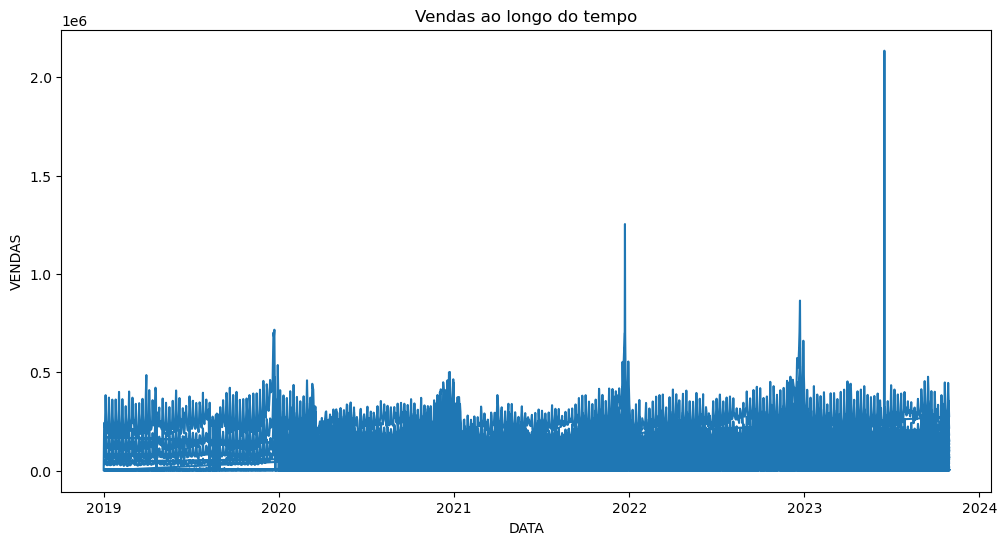

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df['DATA_VENDA'], df['VALOR_VENDA'])
plt.xlabel('DATA')
plt.ylabel('VENDAS')
plt.title('Vendas ao longo do tempo')
plt.show()

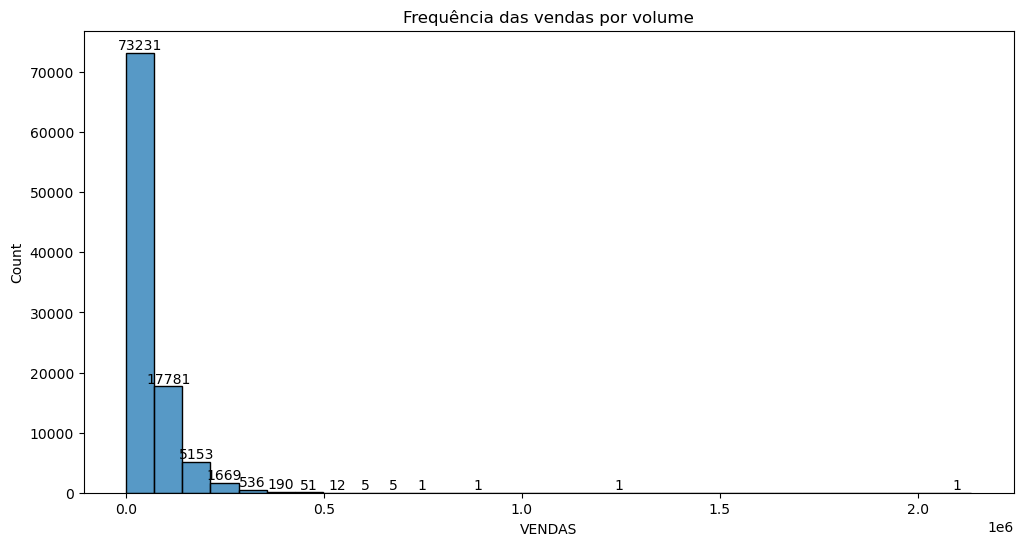

In [27]:
# Distribution of sales with data labels
plt.figure(figsize=(12, 6))
ax = sns.histplot(df["VALOR_VENDA"], bins=30)
plt.xlabel('VENDAS')
plt.title('Frequência das vendas por volume')

# Adding data labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

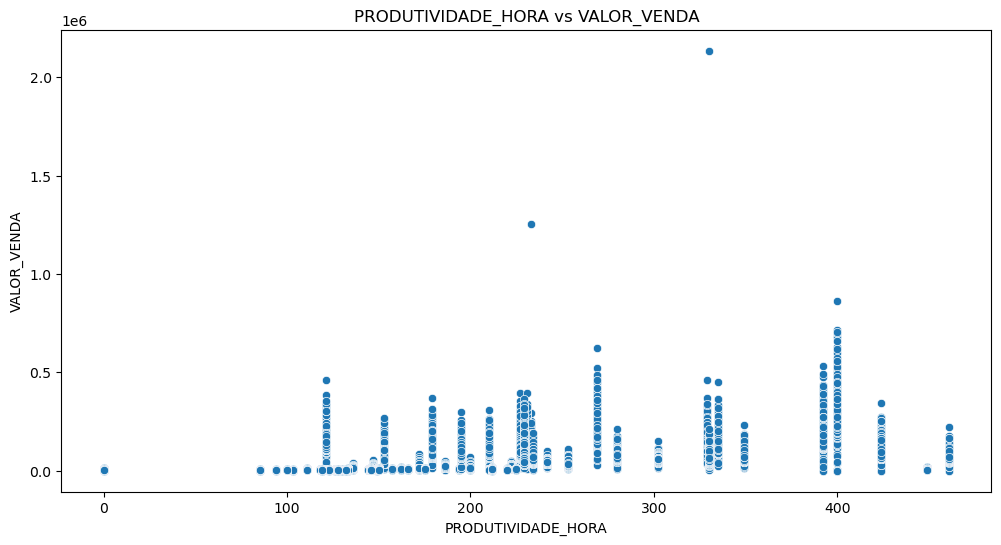

In [28]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="PRODUTIVIDADE_HORA", y='VALOR_VENDA', data=df)
plt.xlabel('PRODUTIVIDADE_HORA')
plt.ylabel('VALOR_VENDA')
plt.title('PRODUTIVIDADE_HORA vs VALOR_VENDA')
plt.show()

C:\Users\ideva\AppData\Local\Temp\ipykernel_23868\899014711.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='NOME_EVENTO', y='VALOR_VENDA', data=df, estimator=sum, ci=None)


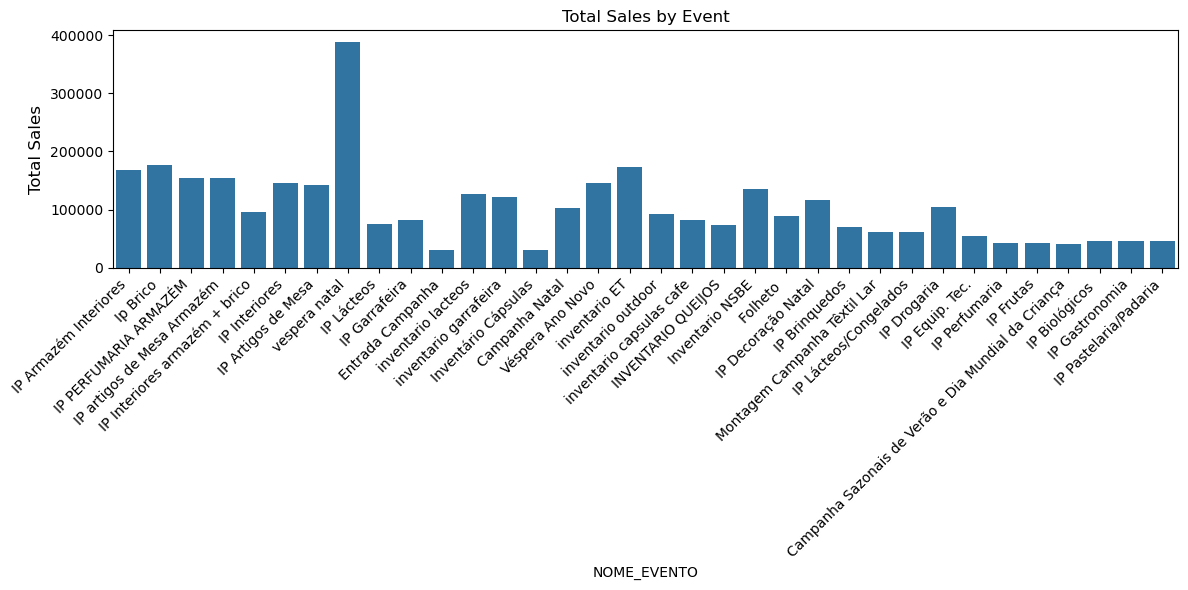

In [29]:
# Calculate total sales by event

plt.figure(figsize=(12, 6))
sns.barplot(x='NOME_EVENTO', y='VALOR_VENDA', data=df, estimator=sum, ci=None)
plt.title('Total Sales by Event')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Sales', fontsize=12)
plt.tight_layout()
plt.show()

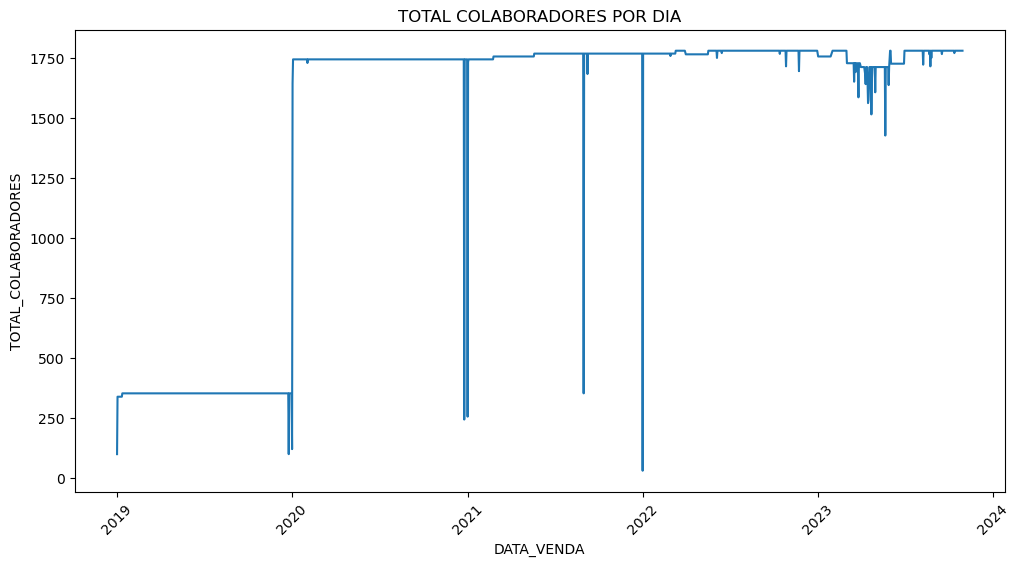

In [31]:
COLABORADORES_POR_DIA = df.groupby("DATA_VENDA")['TOTAL_COLABORADORES'].sum().reset_index()

# Plot total employees working each day
plt.figure(figsize=(12, 6))
sns.lineplot(x="DATA_VENDA", y='TOTAL_COLABORADORES', data=COLABORADORES_POR_DIA)
plt.xlabel('DATA_VENDA')
plt.ylabel('TOTAL_COLABORADORES')
plt.title('TOTAL COLABORADORES POR DIA')
plt.xticks(rotation=45)
plt.show()

C:\Users\ideva\AppData\Local\Temp\ipykernel_23868\3942294362.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='NOME_EVENTO', y='VALOR_VENDA', data=df, estimator=sum, ci=None)


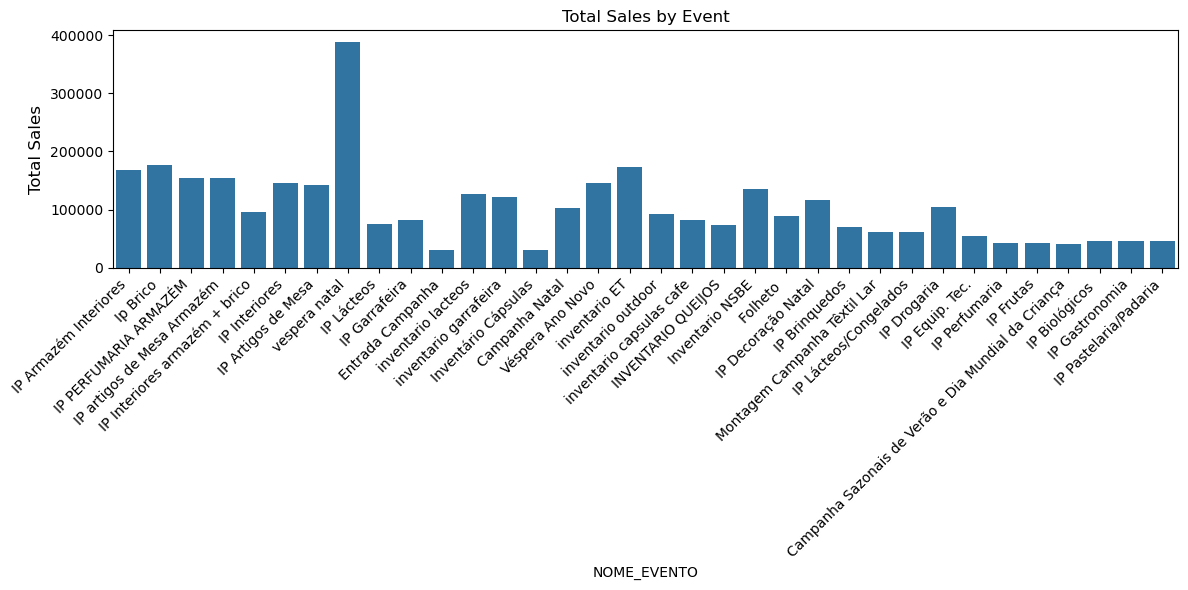

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x='NOME_EVENTO', y='VALOR_VENDA', data=df, estimator=sum, ci=None)
plt.title('Total Sales by Event')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Sales', fontsize=12)
plt.tight_layout()
plt.show()

In [37]:
# Extracting day of week from 'DATA_VENDA'

df['DAY_OF_WEEK'] = df['DATA_VENDA'].dt.dayofweek

# Creating a new feature for the duration of events

df['EVENT_DURATION'] = (pd.to_datetime(df['FIM_EVENTO']) - pd.to_datetime(df['INICIO_EVENTO'])).dt.days

In [31]:
# Set 'DATA_VENDA' as index for time series analysis

df.set_index('DATA_VENDA', inplace=True)

In [32]:
# Resample to monthly data and calculate total 'VALOR_VENDA'

monthly_sales = df['VALOR_VENDA'].resample('M').sum()
print(monthly_sales)

DATA_VENDA
2019-01-31    16,017,915.97
2019-02-28    14,861,078.91
2019-03-31    17,196,148.52
2019-04-30    17,175,638.69
2019-05-31    16,763,958.92
2019-06-30    17,625,360.38
2019-07-31    18,080,923.29
2019-08-31    17,132,583.24
2019-09-30    18,063,112.77
2019-10-31    17,360,198.46
2019-11-30    18,613,835.30
2019-12-31    26,810,612.21
2020-01-31    79,980,224.81
2020-02-29    79,626,663.69
2020-03-31    95,440,007.10
2020-04-30    90,995,585.50
2020-05-31    97,266,009.12
2020-06-30    86,868,182.26
2020-07-31    92,413,221.80
2020-08-31    95,068,050.67
2020-09-30    89,175,101.50
2020-10-31    90,925,070.43
2020-11-30    88,560,741.53
2020-12-31   128,082,440.06
2021-01-31    82,252,777.00
2021-02-28    77,268,593.36
2021-03-31    85,676,761.50
2021-04-30    88,491,333.55
2021-05-31    85,953,193.25
2021-06-30    82,682,505.80
2021-07-31    89,276,331.84
2021-08-31    89,528,324.89
2021-09-30    88,007,283.25
2021-10-31    91,614,591.18
2021-11-30    92,209,205.39
2021-12-3

C:\Users\ideva\AppData\Local\Temp\ipykernel_23868\551393656.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['VALOR_VENDA'].resample('M').sum()


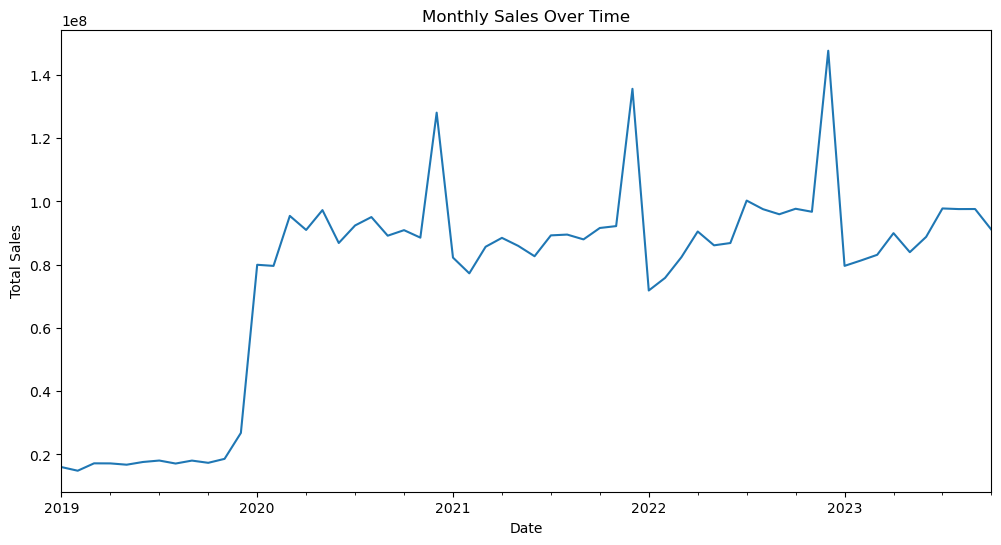

In [33]:
# Plotting the time series data

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()